In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics.cluster import contingency_matrix

from factor_analyzer import FactorAnalyzer

In [4]:
# laod data file 
df = pd.read_csv("790/StressLevelDataset.csv")

In [5]:
df.head()

anxiety_level  self_esteem  mental_health_history  depression  headache  \
0             14           20                      0          11         2   
1             15            8                      1          15         5   
2             12           18                      1          14         2   
3             16           12                      1          15         4   
4             16           28                      0           7         2   

   blood_pressure  sleep_quality  breathing_problem  noise_level  \
0               1              2                  4            2   
1               3              1                  4            3   
2               1              2                  2            2   
3               3              1                  3            4   
4               3              5                  1            3   

   living_conditions  ...  basic_needs  academic_performance  study_load  \
0                  3  ...            2                     3           2   
1                  1  ...            2                     1           4   
2                  2  ...            2                     2           3   
3                  2  ...            2                     2           4   
4                  2  ...            3                     4           3   

   teacher_student_relationship  future_career_concerns  social_support  \
0                             3                       3               2   
1                             1                       5               1   
2                             3                       2               2   
3                             1                       4               1   
4                             1                       2               1   

   peer_pressure  extracurricular_activities  bullying  stress_level  
0              3                           3         2             1  
1              4                           5         5             2  
2              3                           2         2             1  
3              4                           4         5             2  
4              5                           0         5             1  

[5 rows x 21 columns]

In [8]:
df.shape

(1100, 21)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [12]:
df.describe()

anxiety_level  self_esteem  mental_health_history   depression  \
count    1100.000000  1100.000000            1100.000000  1100.000000   
mean       11.063636    17.777273               0.492727    12.555455   
std         6.117558     8.944599               0.500175     7.727008   
min         0.000000     0.000000               0.000000     0.000000   
25%         6.000000    11.000000               0.000000     6.000000   
50%        11.000000    19.000000               0.000000    12.000000   
75%        16.000000    26.000000               1.000000    19.000000   
max        21.000000    30.000000               1.000000    27.000000   

          headache  blood_pressure  sleep_quality  breathing_problem  \
count  1100.000000     1100.000000    1100.000000        1100.000000   
mean      2.508182        2.181818       2.660000           2.753636   
std       1.409356        0.833575       1.548383           1.400713   
min       0.000000        1.000000       0.000000           0.000000   
25%       1.000000        1.000000       1.000000           2.000000   
50%       3.000000        2.000000       2.500000           3.000000   
75%       3.000000        3.000000       4.000000           4.000000   
max       5.000000        3.000000       5.000000           5.000000   

       noise_level  living_conditions  ...  basic_needs  academic_performance  \
count  1100.000000        1100.000000  ...  1100.000000           1100.000000   
mean      2.649091           2.518182  ...     2.772727              2.772727   
std       1.328127           1.119208  ...     1.433761              1.414594   
min       0.000000           0.000000  ...     0.000000              0.000000   
25%       2.000000           2.000000  ...     2.000000              2.000000   
50%       3.000000           2.000000  ...     3.000000              2.000000   
75%       3.000000           3.000000  ...     4.000000              4.000000   
max       5.000000           5.000000  ...     5.000000              5.000000   

        study_load  teacher_student_relationship  future_career_concerns  \
count  1100.000000                   1100.000000             1100.000000   
mean      2.621818                      2.648182                2.649091   
std       1.315781                      1.384579                1.529375   
min       0.000000                      0.000000                0.000000   
25%       2.000000                      2.000000                1.000000   
50%       2.000000                      2.000000                2.000000   
75%       3.000000                      4.000000                4.000000   
max       5.000000                      5.000000                5.000000   

       social_support  peer_pressure  extracurricular_activities     bullying  \
count     1100.000000    1100.000000                 1100.000000  1100.000000   
mean         1.881818       2.734545                    2.767273     2.617273   
std          1.047826       1.425265                    1.417562     1.530958   
min          0.000000       0.000000                    0.000000     0.000000   
25%          1.000000       2.000000                    2.000000     1.000000   
50%          2.000000       2.000000                    2.500000     3.000000   
75%          3.000000       4.000000                    4.000000     4.000000   
max          3.000000       5.000000                    5.000000     5.000000   

       stress_level  
count   1100.000000  
mean       0.996364  
std        0.821673  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        2.000000  
max        2.000000  

[8 rows x 21 columns]

In [13]:
df.isnull().sum()

anxiety_level                   0
self_esteem                     0
mental_health_history           0
depression                      0
headache                        0
blood_pressure                  0
sleep_quality                   0
breathing_problem               0
noise_level                     0
living_conditions               0
safety                          0
basic_needs                     0
academic_performance            0
study_load                      0
teacher_student_relationship    0
future_career_concerns          0
social_support                  0
peer_pressure                   0
extracurricular_activities      0
bullying                        0
stress_level                    0
dtype: int64

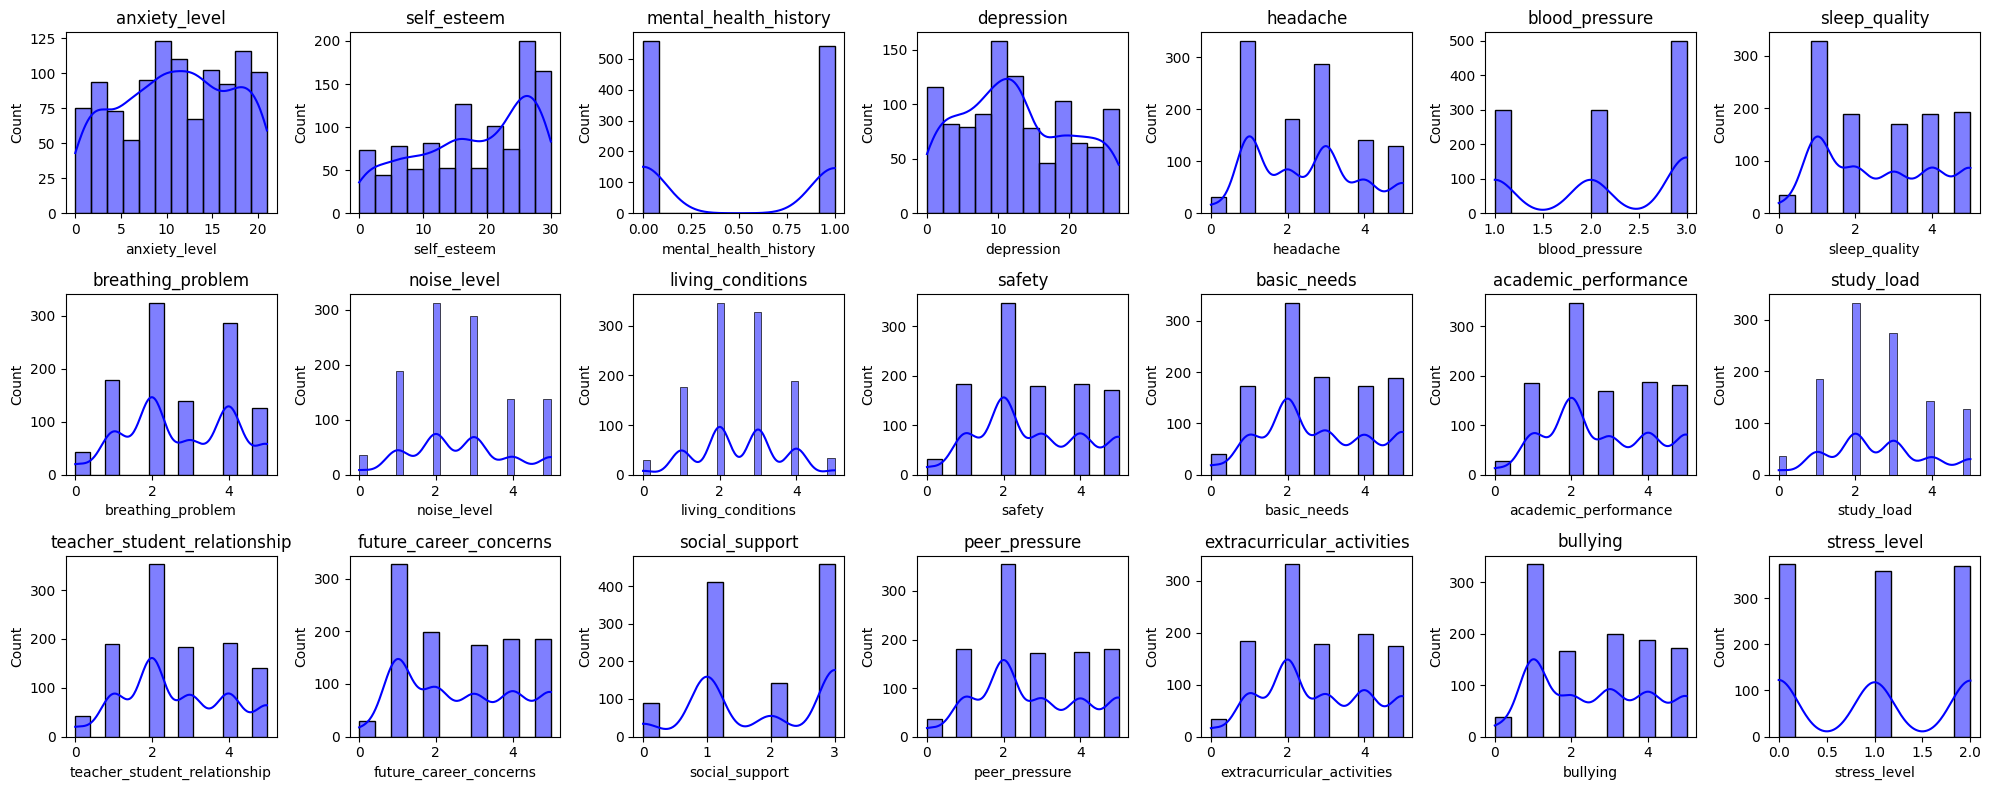

In [20]:
# plot distributions

fig, axs = plt.subplots(3, 7, figsize=(20, 8))
axs = axs.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, color="blue", ax=axs[i])
    axs[i].set_title(col)
plt.tight_layout()
fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/stress_distributions.png', dpi=300)

plt.show()

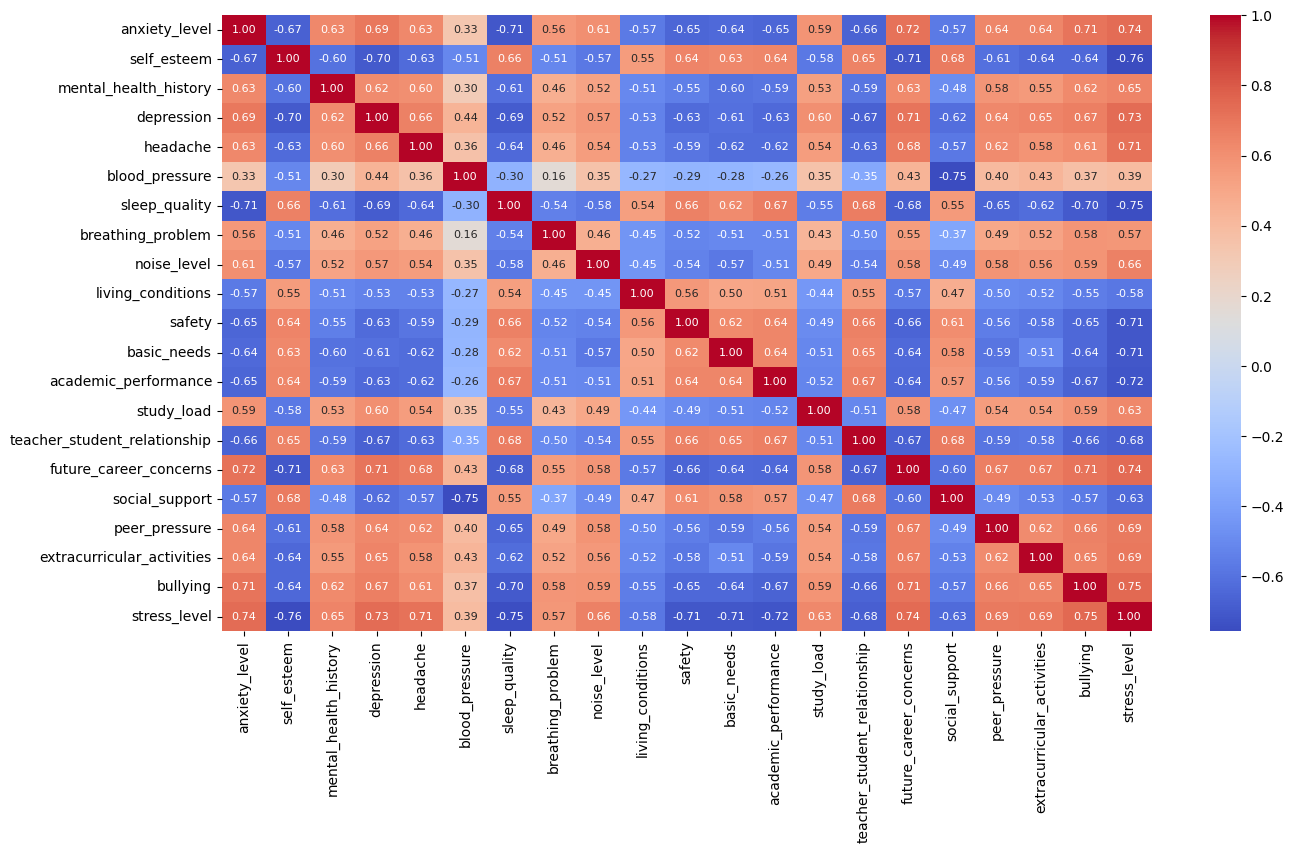

In [26]:
# correlation plot 
corr_matrix = df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(
    corr_matrix, 
    annot=True,
    annot_kws={"fontsize":8}, 
    fmt=".2f", 
    cmap="coolwarm")

fig = plt.gcf()
fig.savefig('/Users/elvaliu/Classes/python_project/780_assignment_shinny/790/stress_corr.png', dpi=300)
plt.show()

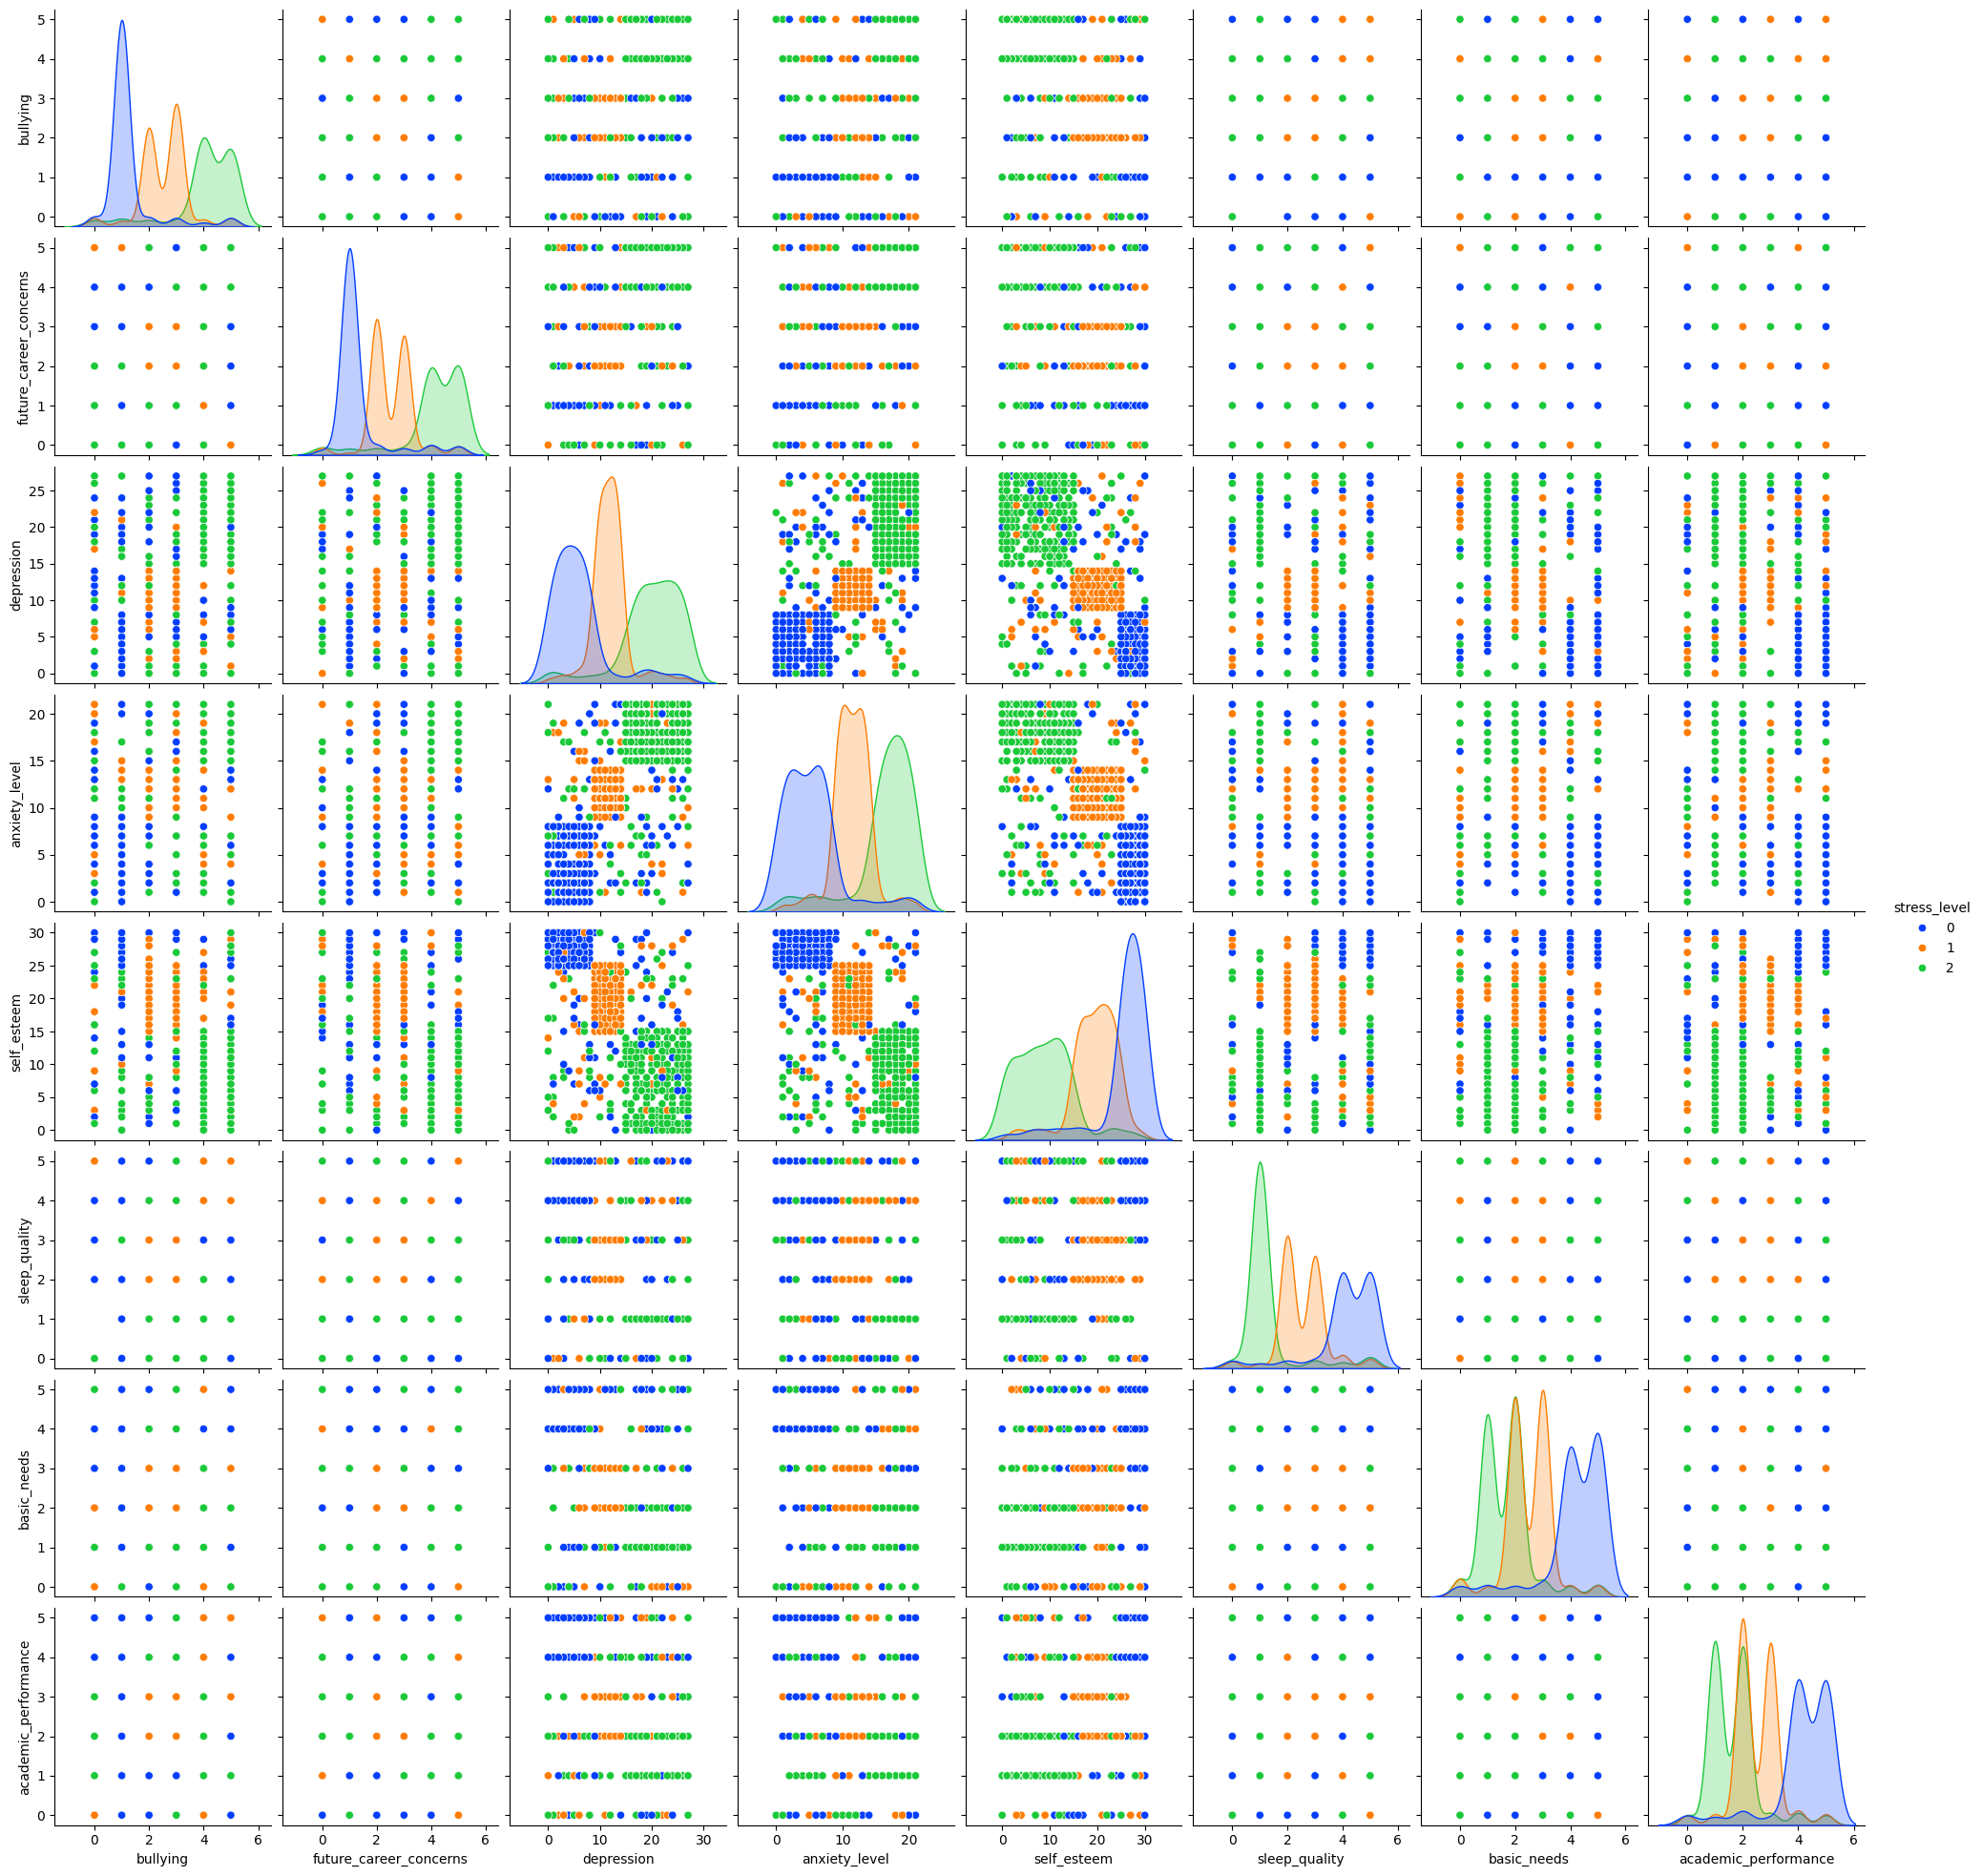

In [41]:
# pair plot on highly correlated variables

subset_cols = [
    "bullying", 
    "future_career_concerns", 
    "depression", 
    "anxiety_level", 
    "self_esteem", 
    "sleep_quality", 
    "basic_needs", 
    "academic_performance", 
    "stress_level"  
]


sns.pairplot(df[subset_cols], hue="stress_level", diag_kind="kde",palette="bright")
fig = plt.gcf()
fig.savefig('790/stress_pairplot.png', dpi=300)
plt.show()

In [56]:
X = df.drop('stress_level', axis=1)
y = df['stress_level'].astype('category')


In [57]:
# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Explained Variance Ratio per Component:
[0.59556883 0.05980731 0.03466417 0.0296916  0.02787059 0.02629225
 0.02370668 0.02273313 0.02027814 0.01918701 0.01805376 0.01720968
 0.01622571 0.01565658 0.01548479 0.01397405 0.01366091 0.0133039
 0.01148993 0.00514097]

Cumulative Explained Variance:
[0.59556883 0.65537614 0.69004031 0.71973191 0.7476025  0.77389475
 0.79760144 0.82033457 0.8406127  0.85979971 0.87785347 0.89506315
 0.91128886 0.92694545 0.94243024 0.95640429 0.9700652  0.9833691
 0.99485903 1.        ]


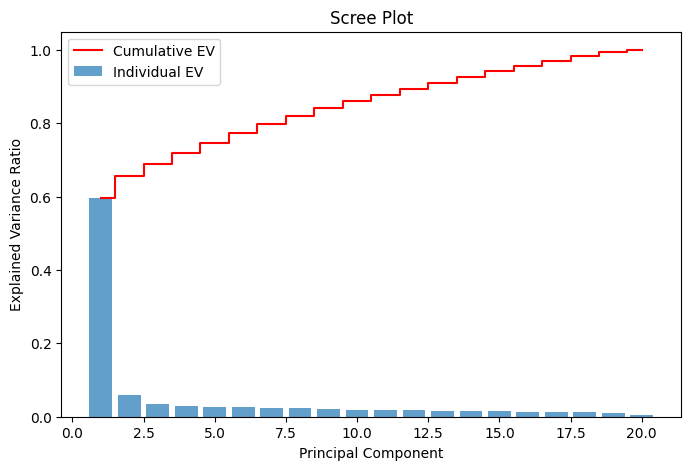

In [58]:
# PCA analysis
pca = PCA()
X_pca_full = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

print("Explained Variance Ratio per Component:")
print(explained_variance_ratio)
print("\nCumulative Explained Variance:")
print(cumulative_variance_ratio)

plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual EV')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', color='red', label='Cumulative EV')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.legend()
plt.show()

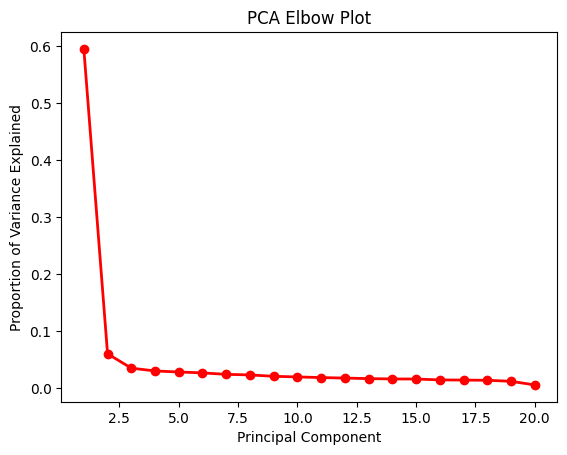

In [59]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('PCA Elbow Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [60]:
#choose the first 8 components
n_components = 8
pca_k = PCA(n_components=n_components)

X_pca = pca_k.fit_transform(X_scaled)

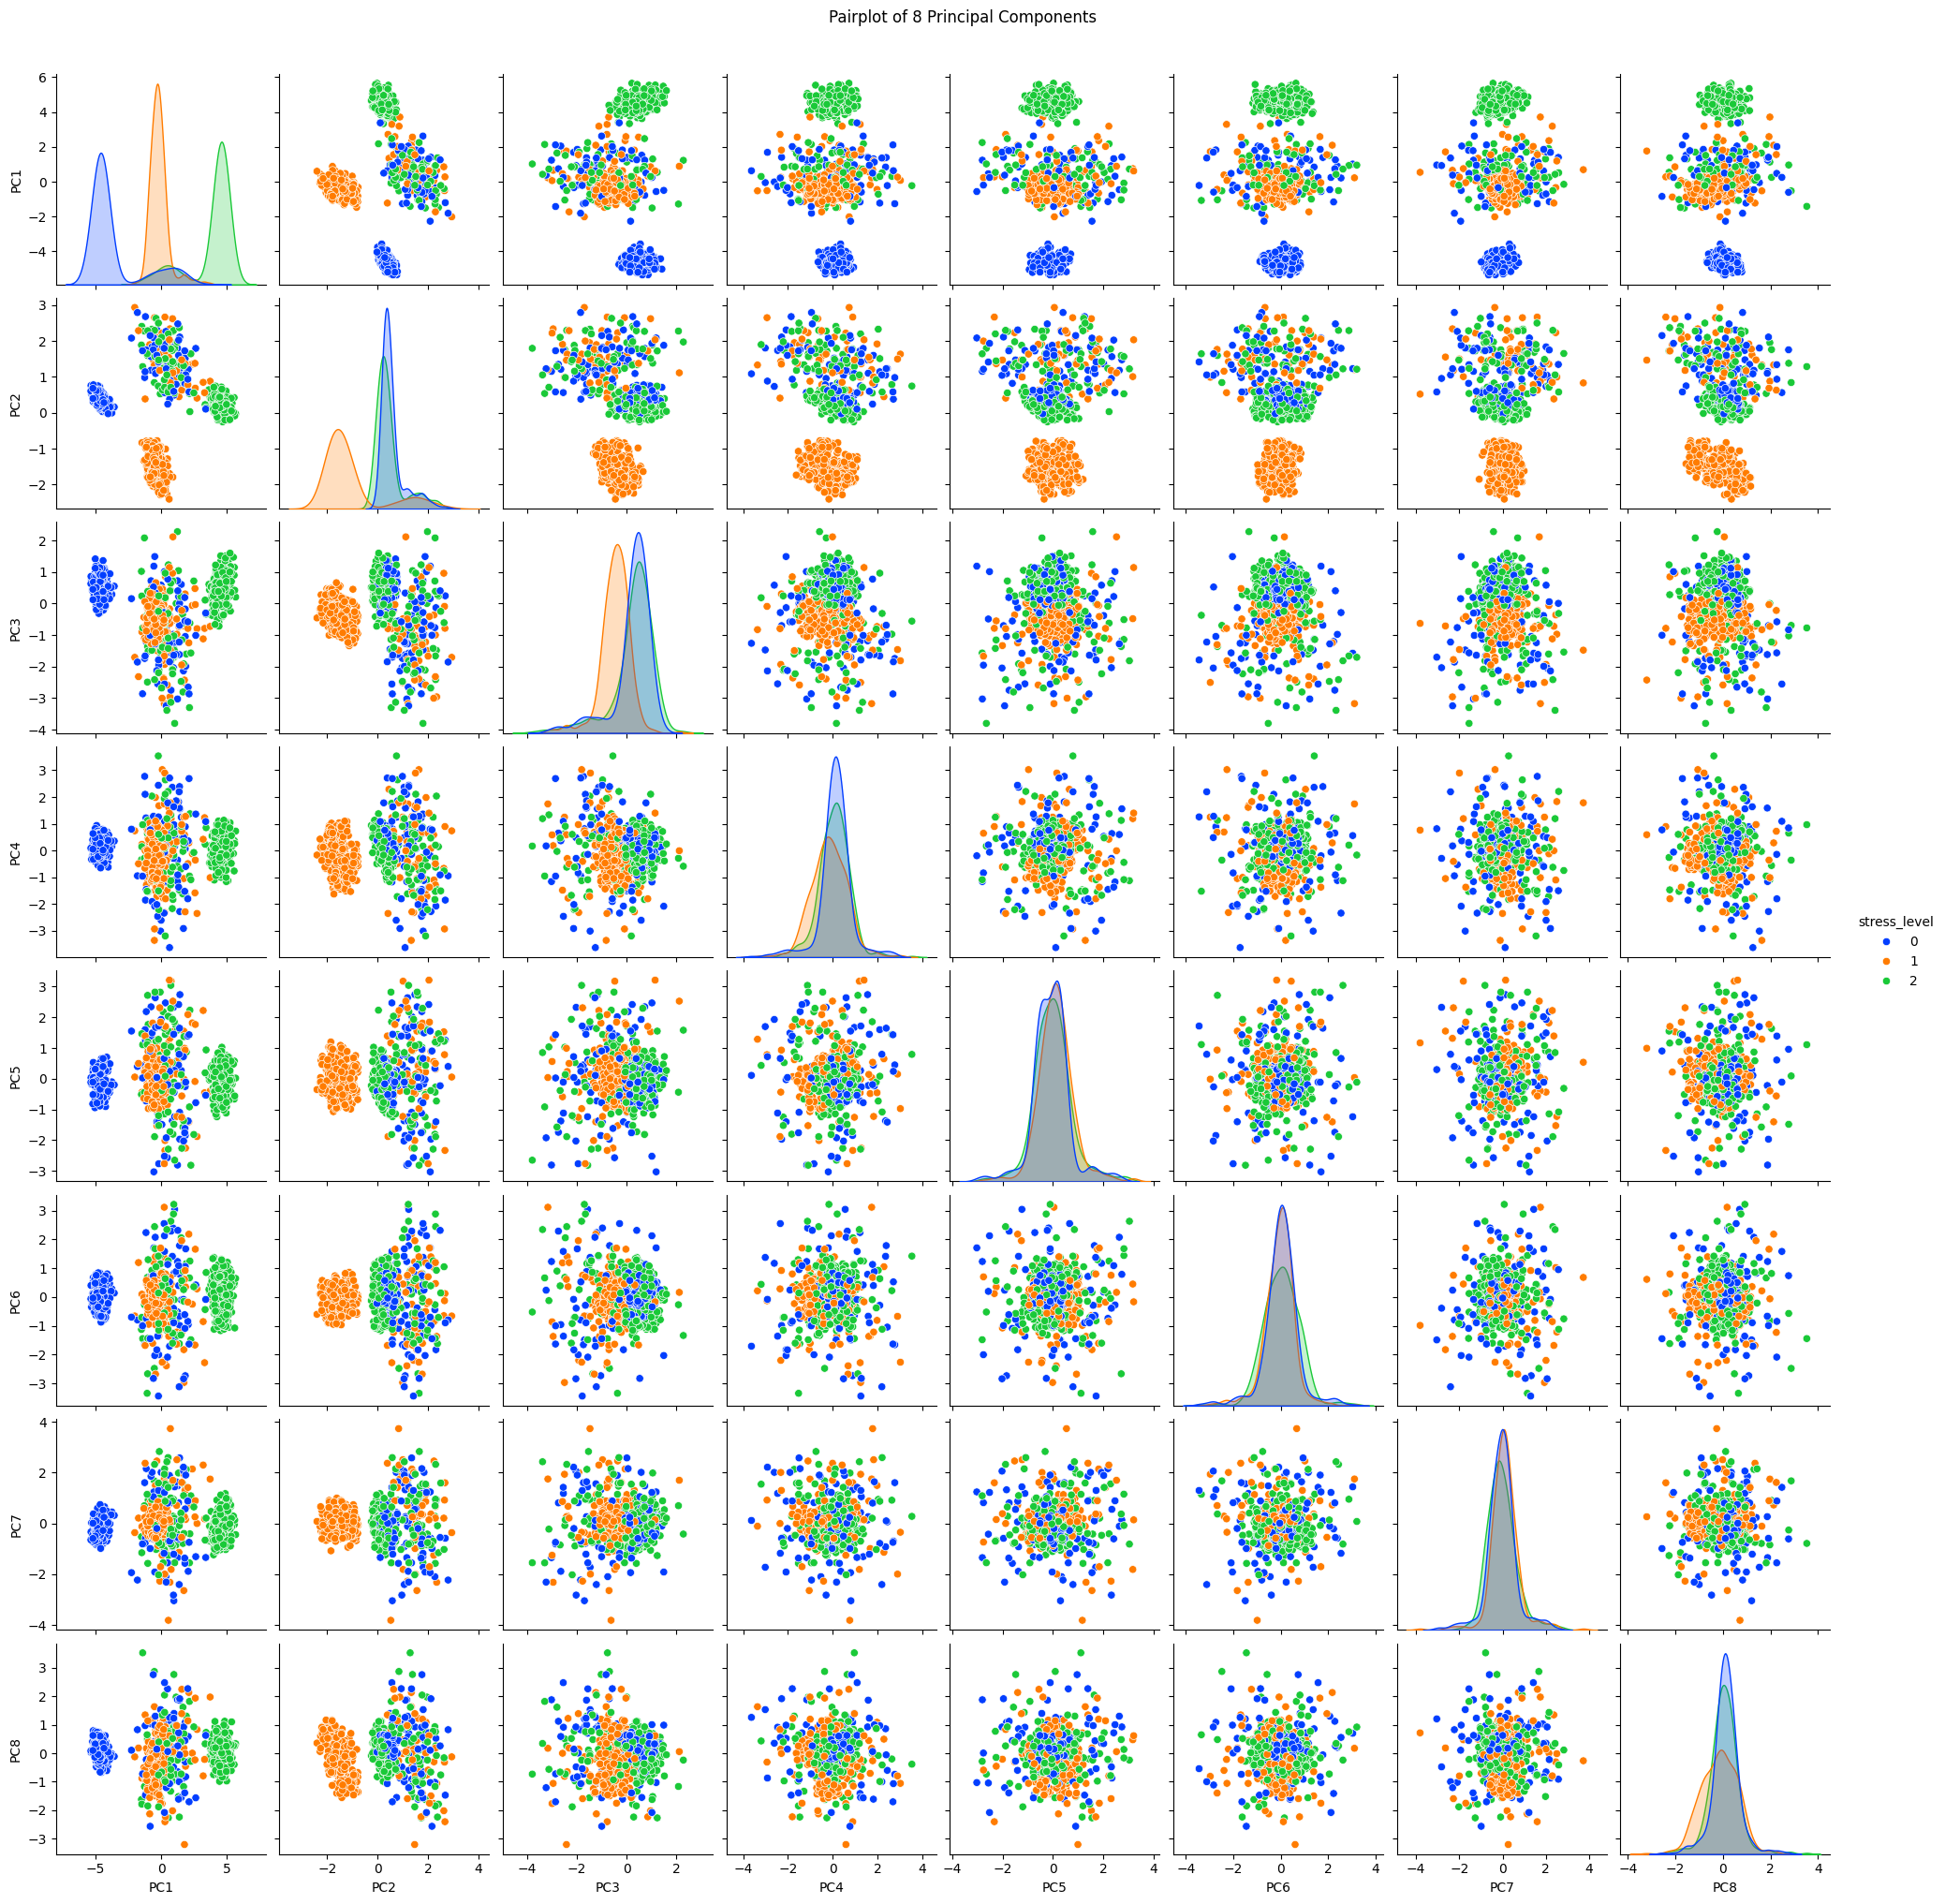

In [61]:
#pair plot using PCA
pca_df_train = pd.DataFrame(
    X_pca,
    columns=[f'PC{i+1}' for i in range(n_components)]
)
pca_df_train['stress_level'] = y.values

sns.pairplot(
    pca_df_train,
    hue='stress_level',
    diag_kind='kde',
    palette='bright'
)
plt.suptitle('Pairplot of 8 Principal Components', y=1.02)
#fig = plt.gcf()
#fig.savefig('790/PCA_pair.png',dpi=300)
plt.show()

In [ ]:
# KMean clustering on PCA
kmeans_pca = KMeans(n_clusters=3, random_state=42)
y_pred_pca = kmeans_pca.fit_predict(X_pca)

cm_pca = contingency_matrix(y, y_pred_pca)
ari_pca = adjusted_rand_score(y, y_pred_pca)

print("\n=== Clustering on PCA-Transformed Variables ===")
print(f"Contingency Matrix:\n {cm_pca}")
print(f"Adjusted Rand Index: {ari_pca:.2f}")

# missclassification rate is: 0.13 


=== Clustering on PCA-Transformed Variables ===
Contingency Matrix:
 [[301  70   2]
 [  0 351   7]
 [  0  67 302]]
Adjusted Rand Index: 0.63


In [64]:
# KMean clustering on original variables

kmeans_orig = KMeans(n_clusters=3, random_state=42)
y_pred_orig = kmeans_pca.fit_predict(X_scaled)

cm_orig = contingency_matrix(y, y_pred_orig)
ari_orig = adjusted_rand_score(y, y_pred_orig)

print("\n=== Clustering on original Variables ===")
print(f"Contingency Matrix:\n {cm_orig}")
print(f"Adjusted Rand Index: {ari_orig:.2f}")

# missclassification rate is: 0.13 


=== Clustering on original Variables ===
Contingency Matrix:
 [[301  70   2]
 [  0 351   7]
 [  0  67 302]]
Adjusted Rand Index: 0.63


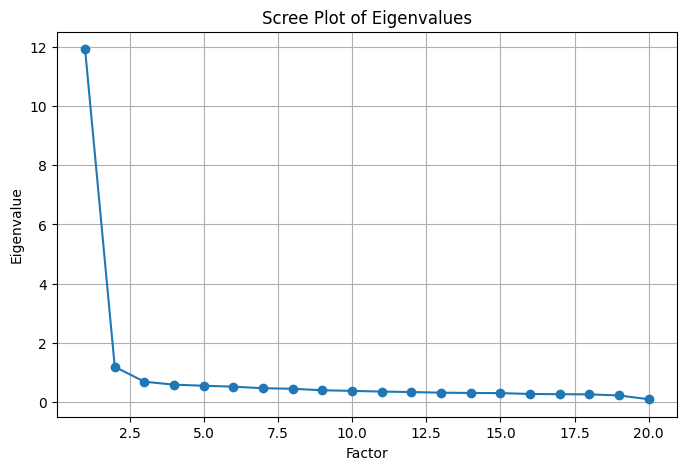

In [66]:
#FA analysis

fa = FactorAnalyzer(n_factors=X.shape[1], rotation=None)
fa.fit(X_scaled)

ev, v = fa.get_eigenvalues()

# Scree plot
plt.figure(figsize=(8,5))
plt.plot(range(1, X.shape[1]+1), ev, marker='o', linestyle='-')
plt.title('Scree Plot of Eigenvalues')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.show()



In [ ]:
n_factors = 4  
fa_final = FactorAnalyzer(n_factors=n_factors, rotation='promax')
fa_final.fit(X_scaled)

# Factor loadings 
loadings = fa_final.loadings_
loadings_df = pd.DataFrame(loadings, 
                           columns=[f'Factor{i+1}' for i in range(n_factors)],
                           index=X.columns)
print("Factor Loadings:")
print(loadings_df)

Factor Loadings:
                               Factor1   Factor2   Factor3   Factor4
anxiety_level                 0.717605 -0.161154 -0.035515  0.035065
self_esteem                  -0.512705  0.248820 -0.197671 -0.030090
mental_health_history         0.607010 -0.092487 -0.057060  0.223536
depression                    0.633624 -0.147083  0.102697  0.074583
headache                      0.524194 -0.178369  0.014846  0.244602
blood_pressure                0.079269  0.047917  0.989655 -0.062203
sleep_quality                -0.655323  0.227275  0.072073 -0.051767
breathing_problem             0.662008 -0.116425 -0.135950 -0.091646
noise_level                   0.616604 -0.044561  0.054873  0.079112
living_conditions            -0.494981  0.224435  0.018480  0.004773
safety                       -0.396385  0.522529  0.053254  0.062615
basic_needs                  -0.370165  0.401923  0.100131 -0.262651
academic_performance         -0.450693  0.412095  0.104580 -0.089058
study_load       

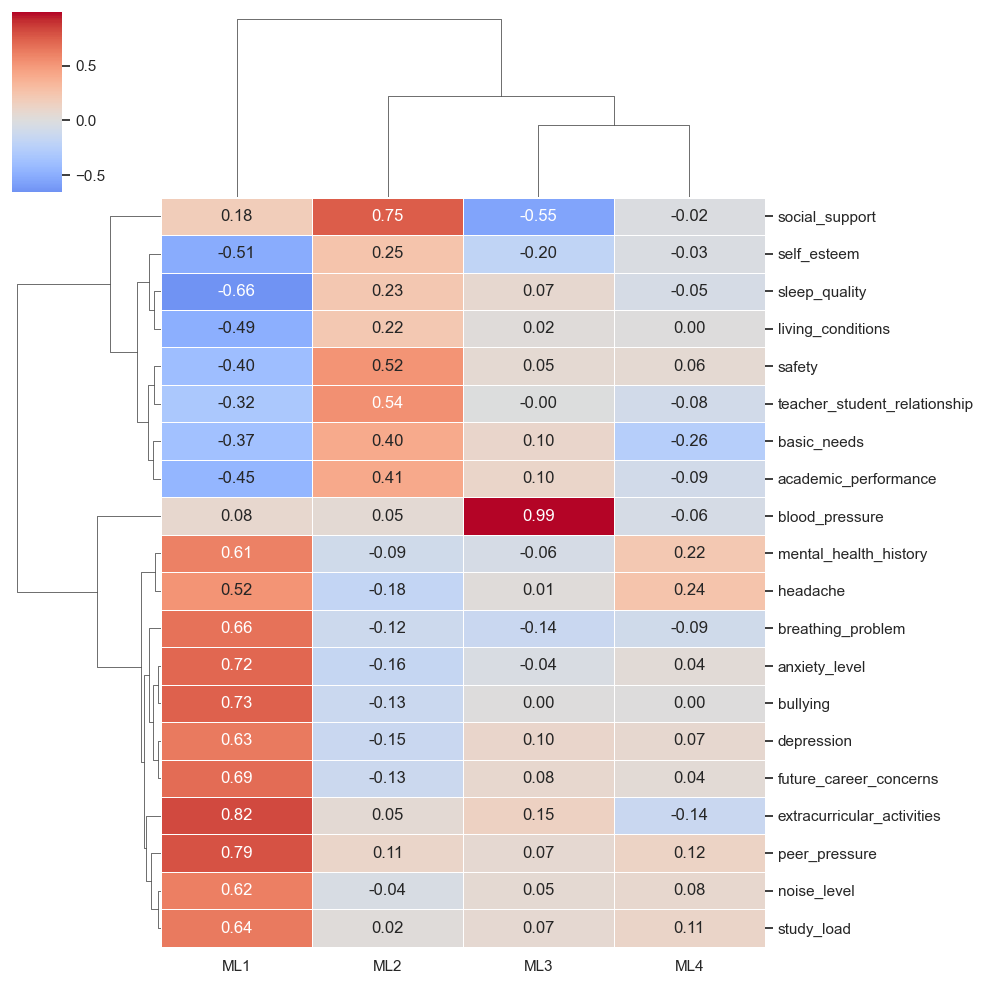

In [75]:
loadings_df = pd.DataFrame(
    loadings,
    index=X.columns,
    columns=[f"ML{i+1}" for i in range(loadings.shape[1])]  
)

sns.set(rc={'figure.figsize':(8, 10)})

g = sns.clustermap(
    loadings_df,
    metric="euclidean",       
    method="ward",            
    cmap="coolwarm",          
    center=0,                 
    annot=True,               
    fmt=".2f",               
    linewidths=.5,            
    col_cluster=True,         
    row_cluster=True          
)

#g.fig.suptitle("Factor Loadings Heatmap", y=1.02)
fig = plt.gcf()
fig.savefig('790/FA_stress.png', dpi=300)
plt.show()



In [69]:
# variance explained by each factor
variance_info = fa_final.get_factor_variance()
variance_df = pd.DataFrame({
    'Factor': [f'Factor{i+1}' for i in range(n_factors)],
    'Variance': variance_info[0],
    'Proportion': variance_info[1],
    'Cumulative': variance_info[2]
})
print("\nVariance Explained by Each Factor:")
print(variance_df)



Variance Explained by Each Factor:
    Factor  Variance  Proportion  Cumulative
0  Factor1  6.677258    0.333863    0.333863
1  Factor2  1.780865    0.089043    0.422906
2  Factor3  1.428140    0.071407    0.494313
3  Factor4  0.276970    0.013848    0.508162


In [74]:
ev, v = fa_final.get_eigenvalues()
print("Eigenvalues:", ev)
print("Variance Info:", v)

Eigenvalues: [11.91137666  1.19614612  0.69328345  0.59383199  0.55741186  0.52584496
  0.47413369  0.45466259  0.40556274  0.38374015  0.3610752   0.34419362
  0.32451427  0.31313165  0.3096958   0.27948105  0.27321819  0.26607804
  0.22979861  0.10281937]
Variance Info: [ 1.14084006e+01  1.08214829e+00  3.20105703e-01  1.13025475e-01
  4.20979072e-02  7.30880185e-03 -5.38088624e-02 -9.07340838e-02
 -1.14572092e-01 -1.30426589e-01 -1.43281335e-01 -1.56698850e-01
 -1.90714321e-01 -2.21322702e-01 -2.33692659e-01 -2.59827496e-01
 -2.78932689e-01 -2.89054438e-01 -2.97720802e-01 -3.49067346e-01]


In [70]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo

# Bartlett’s test of sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(X_scaled)
print(f"Bartlett's test: chi-square={chi_square_value:.2f}, p-value={p_value:.3e}")

# Kaiser-Meyer-Olkin (KMO) test
kmo_all, kmo_model = calculate_kmo(X_scaled)
print(f"KMO Overall: {kmo_model:.2f}")


Bartlett's test: chi-square=17505.87, p-value=0.000e+00
KMO Overall: 0.97


/Users/elvaliu/Classes/python_project/780_assignment_shinny/shinny/lib/python3.12/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(
